In [1]:
import pyreadstat
import pandas as pd
import numpy as np

# Reading Data

In [2]:
df, meta = pyreadstat.read_sav("m_d_806.sav")
columns = ["AGEM","YOBM","QTRBTHM","AGEQK","SEXK","SEX2ND","RACEM","KIDCOUNT","ASEX","AAGE","AQTRBRTH","ASEX2ND","AAGE2ND","AGEQ2ND",
	"WEEKSM","HOURSM","INCOME1M",
          "INCOME2M","FAMINC"]
df = df[columns]
print(df.head())
print(df.shape)

  AGEM  YOBM QTRBTHM  AGEQK SEXK SEX2ND RACEM  KIDCOUNT ASEX AAGE AQTRBRTH  \
0   36  44.0       1   38.0    1      0    01       2.0    0    0        0   
1   37  42.0       2   34.0    1           01       1.0    0    0        0   
2   27  52.0       2   36.0    0      1    01       2.0    0    0        0   
3   25  54.0       3   23.0    0      1    01       2.0    0    0        0   
4   30  49.0       4   44.0    1      0    01       2.0    0    0        0   

  ASEX2ND AAGE2ND  AGEQ2ND WEEKSM HOURSM INCOME1M INCOME2M FAMINC  
0       0       0     22.0     16     30    02405    00000  33385  
1                      NaN     32     35    05005    00000  16460  
2       0       0     30.0     00     00    00000    00000  16005  
3       0       0      9.0     52     38    08705    00000  10310  
4       0       0     22.0     30     40    09005    00000  20640  
(927267, 19)


In [3]:
df.replace(" ", float("NaN"),inplace= True)
df.replace("NA", float("NaN"),inplace= True)
df = df.dropna()
print(df.shape)

(655169, 19)


In [4]:
df.AGEM  = pd.to_numeric(df.AGEM , errors='coerce', downcast='integer')
df=df.dropna()
print(df.shape)
df = df[(df["AGEM"]>=21) & (df["AGEM"]<=35)]
print(df.shape)

(655169, 19)
(474622, 19)


In [5]:
df.KIDCOUNT  = pd.to_numeric(df.KIDCOUNT , errors='coerce', downcast='integer')
df=df.dropna()
df = df[df["KIDCOUNT"]>=2]
print(df.shape,"KIDCOUNT")

(474622, 19) KIDCOUNT


In [6]:
df.AGEQ2ND  = pd.to_numeric(df.AGEQ2ND , errors='coerce', downcast='integer')
df=df.dropna()
df = df[df["AGEQ2ND"]>4]
print(df.shape,"AGEQ2ND")

(418097, 19) AGEQ2ND


In [7]:
df.ASEX  = pd.to_numeric(df.ASEX , errors='coerce', downcast='integer')
df=df.dropna()
#print(df["ASEX"]==0)
df = df[df["ASEX"]==0]
print(df.shape,"ASEX")

(418097, 19) ASEX


In [8]:
df.AAGE  = pd.to_numeric(df.AAGE , errors='coerce', downcast='integer')
df=df.dropna()
#print(df["ASEX"]==0)
df = df[df["AAGE"]==0]
print(df.shape,"AAGE")

(413757, 19) AAGE


In [9]:
df.AQTRBRTH  = pd.to_numeric(df.AQTRBRTH , errors='coerce', downcast='integer')
df=df.dropna()
#print(df["ASEX"]==0)
df = df[df["AQTRBRTH"]==0]
print(df.shape,"AQTRBRTH")


(402014, 19) AQTRBRTH


In [10]:
df.ASEX2ND  = pd.to_numeric(df.ASEX2ND , errors='coerce', downcast='integer')
df=df.dropna()
#print(df["ASEX"]==0)
df = df[df["ASEX2ND"]==0]
print(df.shape,"ASEX2ND")


(402014, 19) ASEX2ND


In [11]:
df.AAGE2ND  = pd.to_numeric(df.AAGE2ND , errors='coerce', downcast='integer')
df=df.dropna()
#print(df["ASEX"]==0)
df = df[df["AAGE2ND"]==0]
print(df.shape,"AAGE2ND")

(400169, 19) AAGE2ND


In [12]:
df.YOBM  = pd.to_numeric(df.YOBM , errors='coerce', downcast='integer')
df=df.dropna()
print(df.shape,"YOBM")
df.QTRBTHM  = pd.to_numeric(df.QTRBTHM , errors='coerce', downcast='integer')
df=df.dropna()
print(df.shape,"QTRBTHM")
df.AGEQK  = pd.to_numeric(df.AGEQK , errors='coerce', downcast='integer')
df=df.dropna()
print(df.shape,"AGEQK")

df['agefstm'] = (((4*(80-df["YOBM"]))-df["QTRBTHM"] -1)-df["AGEQK"])/4
df = df[df["agefstm"]>15]
df.agefstm  = pd.to_numeric(df.agefstm , errors='coerce', downcast='integer')
df=df.dropna()
print(df.shape,"agefstm")



(400169, 19) YOBM
(400169, 19) QTRBTHM
(400169, 19) AGEQK
(392983, 20) agefstm


In [13]:
df.RACEM  = pd.to_numeric(df.RACEM , errors='coerce', downcast='integer')
df=df.dropna()
print(df.shape,"RACEM")


(392983, 20) RACEM


In [14]:
df['blackm'] = (df["RACEM"]==2)
df['hispm'] = (df["RACEM"]==12)
df['whitem'] = (df["RACEM"]==1)


In [15]:
df['othracem'] = 1 -df['blackm']-df['hispm']-df['whitem']

In [16]:
df["boy1st"] = (df["SEXK"]==0)
df["boy2nd"] = (df["SEX2ND"]==0)



In [17]:
print(df['boy1st'].shape)

(392983,)


In [18]:
print(df.shape)

(392983, 26)


In [19]:
df["morekids"] = (df["KIDCOUNT"]>2)

In [20]:
df.WEEKSM  = pd.to_numeric(df.WEEKSM , errors='coerce', downcast='integer')
df=df.dropna()
print(df.shape,"WEEKSM")
df["workedm"] = (df["WEEKSM"]>0)
#print(df["workedm"])

(392983, 27) WEEKSM


In [21]:
df.HOURSM  = pd.to_numeric(df.HOURSM , errors='coerce', downcast='integer')
df=df.dropna()
print(df.shape,"HOURSM")

(392983, 28) HOURSM


In [22]:
df.INCOME1M  = pd.to_numeric(df.INCOME1M , errors='coerce', downcast='integer')
df=df.dropna()
print(df.shape,"INCOME1M")

(392983, 28) INCOME1M


In [23]:
df.INCOME2M  = pd.to_numeric(df.INCOME2M , errors='coerce', downcast='integer')
df=df.dropna()
print(df.shape,"INCOME2M")

(392983, 28) INCOME2M


In [24]:
df["incomem"] = df["INCOME1M"] + np.where(df["INCOME2M"]>0,df["INCOME2M"],0)
df["incomem"] =  df["incomem"]*2.099173554
print(df.shape,"incomem")

(392983, 29) incomem


In [25]:
df.FAMINC  = pd.to_numeric(df.FAMINC , errors='coerce', downcast='integer')
df=df.dropna()
print(df.shape,"FAMINC")

(392983, 29) FAMINC


In [26]:
df["FAMINC"] =  df["FAMINC"]*2.099173554
df["FAMINC"]= np.where(df["FAMINC"]>1,df["FAMINC"],1)
df["FAMINC"] = np.log(df["FAMINC"])
print(df.shape,"FAMINC")

(392983, 29) FAMINC


In [90]:
X_cols = ["morekids","AGEM","agefstm", "boy1st","boy2nd", "blackm", "hispm", "othracem"]
Y_cols = ["incomem"]
X = df[X_cols]
X = np.array(X)
print(X.shape)
Y = df[Y_cols]
Y = np.array(Y)
print(Y.shape)

(392983, 8)
(392983, 1)


# Splitting data into training and testing

In [91]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

# Trainng Decision tree

In [92]:
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
model = DecisionTreeRegressor()

t =cross_val_score(model,x_train, y_train, cv=10)
model.fit(x_train,y_train)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

# Below cell saves decision tree image in .png format

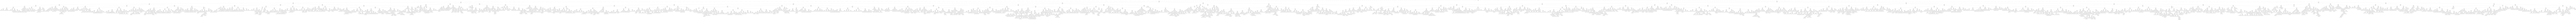

In [93]:
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
graph = Source( tree.export_graphviz(model, out_file=None, feature_names=X_cols))
png_bytes = graph.pipe(format='png')
with open('./all_women/annual_labour_income.png','wb') as f:
    f.write(png_bytes)

from IPython.display import Image
Image(png_bytes)
#tree.export_graphviz(model,out_file='./all_women/worked_for_pay.dot',feature_names =X_cols) 

# Training Linear regression model

In [94]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# OLS Estimate

In [95]:
print("OLS estimate:", reg.coef_[0][0])

OLS estimate: -3766.8980283079636
